# Data Prep

In [456]:
# prepare for Python version 3x features and functions 
from __future__ import division, print_function 

# import packages for analysis and modeling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm # statistical models (including regression) 
import statsmodels.formula.api as smf # R-like model specification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [324]:
# read CSVs
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers2.csv')
circuits = pd.read_csv('circuits2.csv')
standings = pd.read_csv('driverStandings.csv')
pits = pd.read_csv('pitStops.csv')
laps = pd.read_csv('lapTImes.csv')

results.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [105]:
df1 = results[['resultId','raceId','driverId','positionOrder','laps','milliseconds','fastestLap','statusId']]
df1.head()

,resultId,raceId,driverId,positionOrder,laps,milliseconds,fastestLap,statusId
0,1,18,1,1,58,5690616.0,39.0,1
1,2,18,2,2,58,5696094.0,41.0,1
2,3,18,3,3,58,5698779.0,41.0,1
3,4,18,4,4,58,5707797.0,58.0,1
4,5,18,5,5,58,5708630.0,43.0,1


In [81]:
df2 = races[['raceId','year','circuitId']]
df2.head()

,raceId,year,circuitId
0,1,2009,1
1,2,2009,2
2,3,2009,17
3,4,2009,3
4,5,2009,4


In [98]:
df3 = circuits[['circuitId','len','turns','numLaps']]
df3.head()

,circuitId,len,turns,numLaps
0,1,5.0,16.0,58.0
1,2,6.0,15.0,56.0
2,3,5.0,15.0,57.0
3,4,5.0,16.0,66.0
4,5,5.0,14.0,58.0


In [159]:
df4 = pits[['driverId','stop','lap','milliseconds']]
df4.head()

,driverId,stop,lap,milliseconds
0,153,1,1,26898
1,30,1,1,25021
2,17,1,11,23426
3,4,1,12,23251
4,13,1,13,23842


In [160]:
df5 = laps[['driverId','position','milliseconds']]
df5.head()

,driverId,position,milliseconds
0,20,1,98109
1,20,1,93006
2,20,1,92713
3,20,1,92803
4,20,1,92342


# Feature Engineering

In [397]:
avePos = df1.groupby('driverId').mean()[['positionOrder']]
aveFastLap = df1.groupby('driverId').mean()[['fastestLap']].fillna(df1.mean()[['fastestLap']])
aveLapms = df5.groupby('driverId').mean()[['milliseconds']].fillna(df1.mean()[['milliseconds']])
aveLapPos = df5.groupby('driverId').mean()[['position']]
aveNumLaps = df1.groupby('driverId').mean()[['laps']]


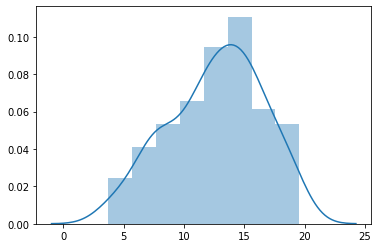

In [460]:
sns.distplot(aveLapPos)

In [398]:
dfr = pd.merge(df2, df3, on=['circuitId', 'circuitId'], how = 'left')
DF = pd.merge(df1, dfr, on=['raceId', 'raceId'])

DF = pd.merge(DF, avePos, on=['driverId', 'driverId'], how = 'left')
DF = pd.merge(DF, aveFastLap, on=['driverId', 'driverId'], how = 'left')
DF = pd.merge(DF, aveLapms, on=['driverId', 'driverId'], how = 'left')
DF = pd.merge(DF, aveLapPos, on=['driverId', 'driverId'], how = 'left')
DF = pd.merge(DF, aveNumLaps, on=['driverId', 'driverId'], how = 'left')

DF.rename(columns={'positionOrder_y':'avePos'}, inplace=True)
DF.rename(columns={'fastestLap_y':'aveFastLap'}, inplace=True)
DF.rename(columns={'milliseconds_y':'avLapTime'}, inplace=True)
DF.rename(columns={'position':'aveLapPos'}, inplace=True)
DF.rename(columns={'positionOrder_x':'finalPos'}, inplace=True)
DF.rename(columns={'fastestLap_x':'fastLap'}, inplace=True)
DF.rename(columns={'milliseconds_x':'totTime'}, inplace=True)
DF.rename(columns={'laps_y':'aveNumLaps'}, inplace=True)

DF.head()

,resultId,raceId,driverId,finalPos,laps_x,totTime,fastLap,statusId,year,circuitId,len,turns,numLaps,avePos,aveFastLap,avLapTime,aveLapPos,aveNumLaps
0,1,18,1,1,58,5690616.0,39.0,1,2008,1,5.0,16.0,58.0,5.485577,42.453202,97605.492437,4.032989,56.245192
1,2,18,2,2,58,5696094.0,41.0,1,2008,1,5.0,16.0,58.0,10.722826,39.217391,92514.578600,9.758066,52.711957
2,3,18,3,3,58,5698779.0,41.0,1,2008,1,5.0,16.0,58.0,8.252427,43.939086,98486.722695,6.653884,54.169903
3,4,18,4,4,58,5707797.0,58.0,1,2008,1,5.0,16.0,58.0,7.911263,42.350806,95808.302944,6.322824,53.901024
4,5,18,5,5,58,5708630.0,43.0,1,2008,1,5.0,16.0,58.0,13.285714,44.527778,100620.957796,12.622174,53.348214


In [515]:
finished = DF['statusId']==1
DF['finished'] = finished.astype(int)
#DF['finished'] = finished
DF.head(10)

,resultId,raceId,driverId,finalPos,laps_x,totTime,fastLap,statusId,year,circuitId,len,turns,numLaps,avePos,aveFastLap,avLapTime,aveLapPos,aveNumLaps,finished,avFinished
0,1,18,1,1,58,5690616.0,39.0,1,2008,1,5.0,16.0,58.0,5.485577,42.453202,97605.492437,4.032989,56.245192,1,0.831731
1,2,18,2,2,58,5696094.0,41.0,1,2008,1,5.0,16.0,58.0,10.722826,39.217391,92514.578600,9.758066,52.711957,1,0.358696
2,3,18,3,3,58,5698779.0,41.0,1,2008,1,5.0,16.0,58.0,8.252427,43.939086,98486.722695,6.653884,54.169903,1,0.703883
3,4,18,4,4,58,5707797.0,58.0,1,2008,1,5.0,16.0,58.0,7.911263,42.350806,95808.302944,6.322824,53.901024,1,0.672355
4,5,18,5,5,58,5708630.0,43.0,1,2008,1,5.0,16.0,58.0,13.285714,44.527778,100620.957796,12.622174,53.348214,1,0.348214
5,6,18,6,6,57,NaN,50.0,11,2008,1,5.0,16.0,58.0,13.083333,41.828571,95103.350913,12.618661,54.777778,0,0.416667
6,7,18,7,7,55,NaN,22.0,5,2008,1,5.0,16.0,58.0,14.148148,33.080000,95072.254702,13.350313,47.370370,0,0.407407
7,8,18,8,8,53,NaN,20.0,5,2008,1,5.0,16.0,58.0,7.813187,40.164319,93472.047914,5.429255,52.043956,0,0.684982
8,9,18,9,9,47,NaN,15.0,4,2008,1,5.0,16.0,58.0,8.789474,39.493333,95863.015465,7.216750,55.302632,0,0.697368
9,10,18,10,10,43,NaN,23.0,3,2008,1,5.0,16.0,58.0,15.231579,42.719101,101818.098968,15.074331,50.063158,0,0.252632


In [404]:
finishAve = DF.groupby('driverId').mean()[['finished']].fillna(.5)
DF = pd.merge(DF, finishAve, on=['driverId', 'driverId'], how = 'left')

In [406]:
DF.rename(columns={'finished_x':'finished'}, inplace=True)
DF.rename(columns={'finished_y':'avFinished'}, inplace=True)

In [458]:
DF2 = DF.drop(columns = ['fastLap','avLapTime','finalPos','totTime','aveLapPos'])
DF2 = DF2.dropna()
#DF2.info()
DF3 = DF2.drop(columns = ['resultId','raceId','driverId','len','statusId','circuitId'])

In [459]:
AllRes = pd.merge(df1, drivers, on=['driverId', 'driverId'], how = 'left')
AllRes = pd.merge(AllRes, races, on=['raceId', 'raceId'], how = 'left')

LFYRes = AllRes[AllRes['year']>2012]
recNum = LFYRes.groupby('code').count()[['positionOrder']]
NewRes = pd.merge(AllRes, recNum, on=['code', 'code'], how = 'left')

finished = NewRes['statusId']==1
NewRes['finished'] = finished.astype(int)

#NewRes.info()

In [293]:
L5YDrivers = NewRes[NewRes['positionOrder_y']>5]
L5YDrivers.info()
#driverStat = pd.merge(driverStat, recNum, on=['code', 'code'], how = 'left')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 0 to 23776
Data columns (total 22 columns):
resultId           3812 non-null int64
raceId             3812 non-null int64
driverId           3812 non-null int64
positionOrder_x    3812 non-null int64
laps               3812 non-null int64
milliseconds       1979 non-null float64
fastestLap         3399 non-null float64
statusId           3812 non-null int64
driverRef          3812 non-null object
number             3434 non-null float64
code               3812 non-null object
dob                3812 non-null object
nationality        3812 non-null object
url_x              3812 non-null object
year               3812 non-null int64
round              3812 non-null int64
circuitId          3812 non-null int64
name               3812 non-null object
date               3812 non-null object
time               3479 non-null object
url_y              3812 non-null object
positionOrder_y    3812 non-null float64
dtypes: float64(4

# Primary Exploration

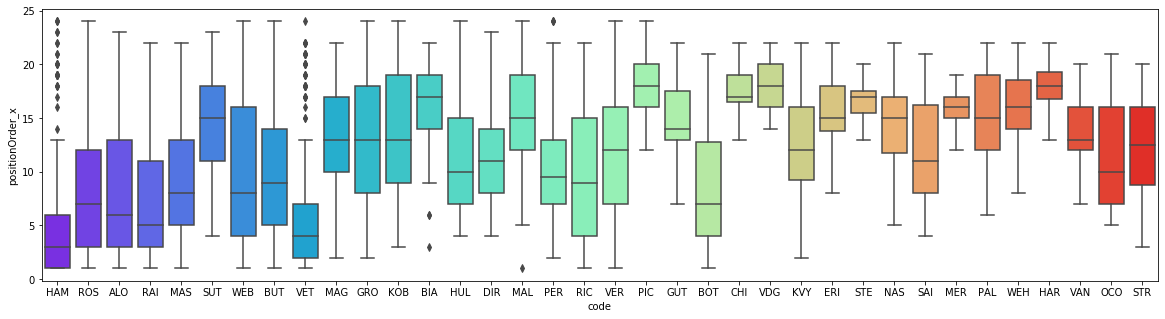

In [295]:
fig, axes = plt.subplots(figsize=(20,5))
sns.boxplot(x="code", y="positionOrder_x", data=L5YDrivers,palette='rainbow')

In [394]:
L5YDrivers2 = NewRes[NewRes['positionOrder_y']>5]
finishAv = L5YDrivers2.groupby('code').mean()[['finished']]
L5YDrivers3 = pd.merge(drivers, finishAv, on=['code', 'code'], how = 'left')
L5YDrivers3 = L5YDrivers3.dropna()
#driverStat = pd.merge(driverStat, recNum, on=['code', 'code'], how = 'left')

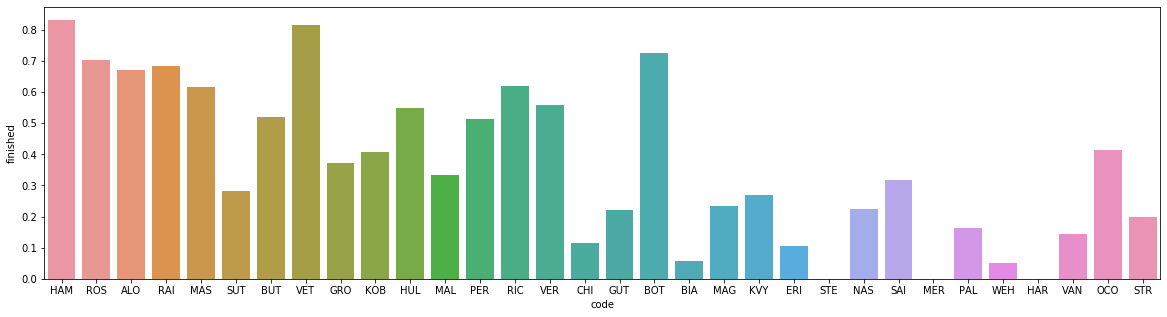

In [395]:
fig, axes = plt.subplots(figsize=(20,5))
sns.barplot(x="code", y="finished", data=L5YDrivers3)

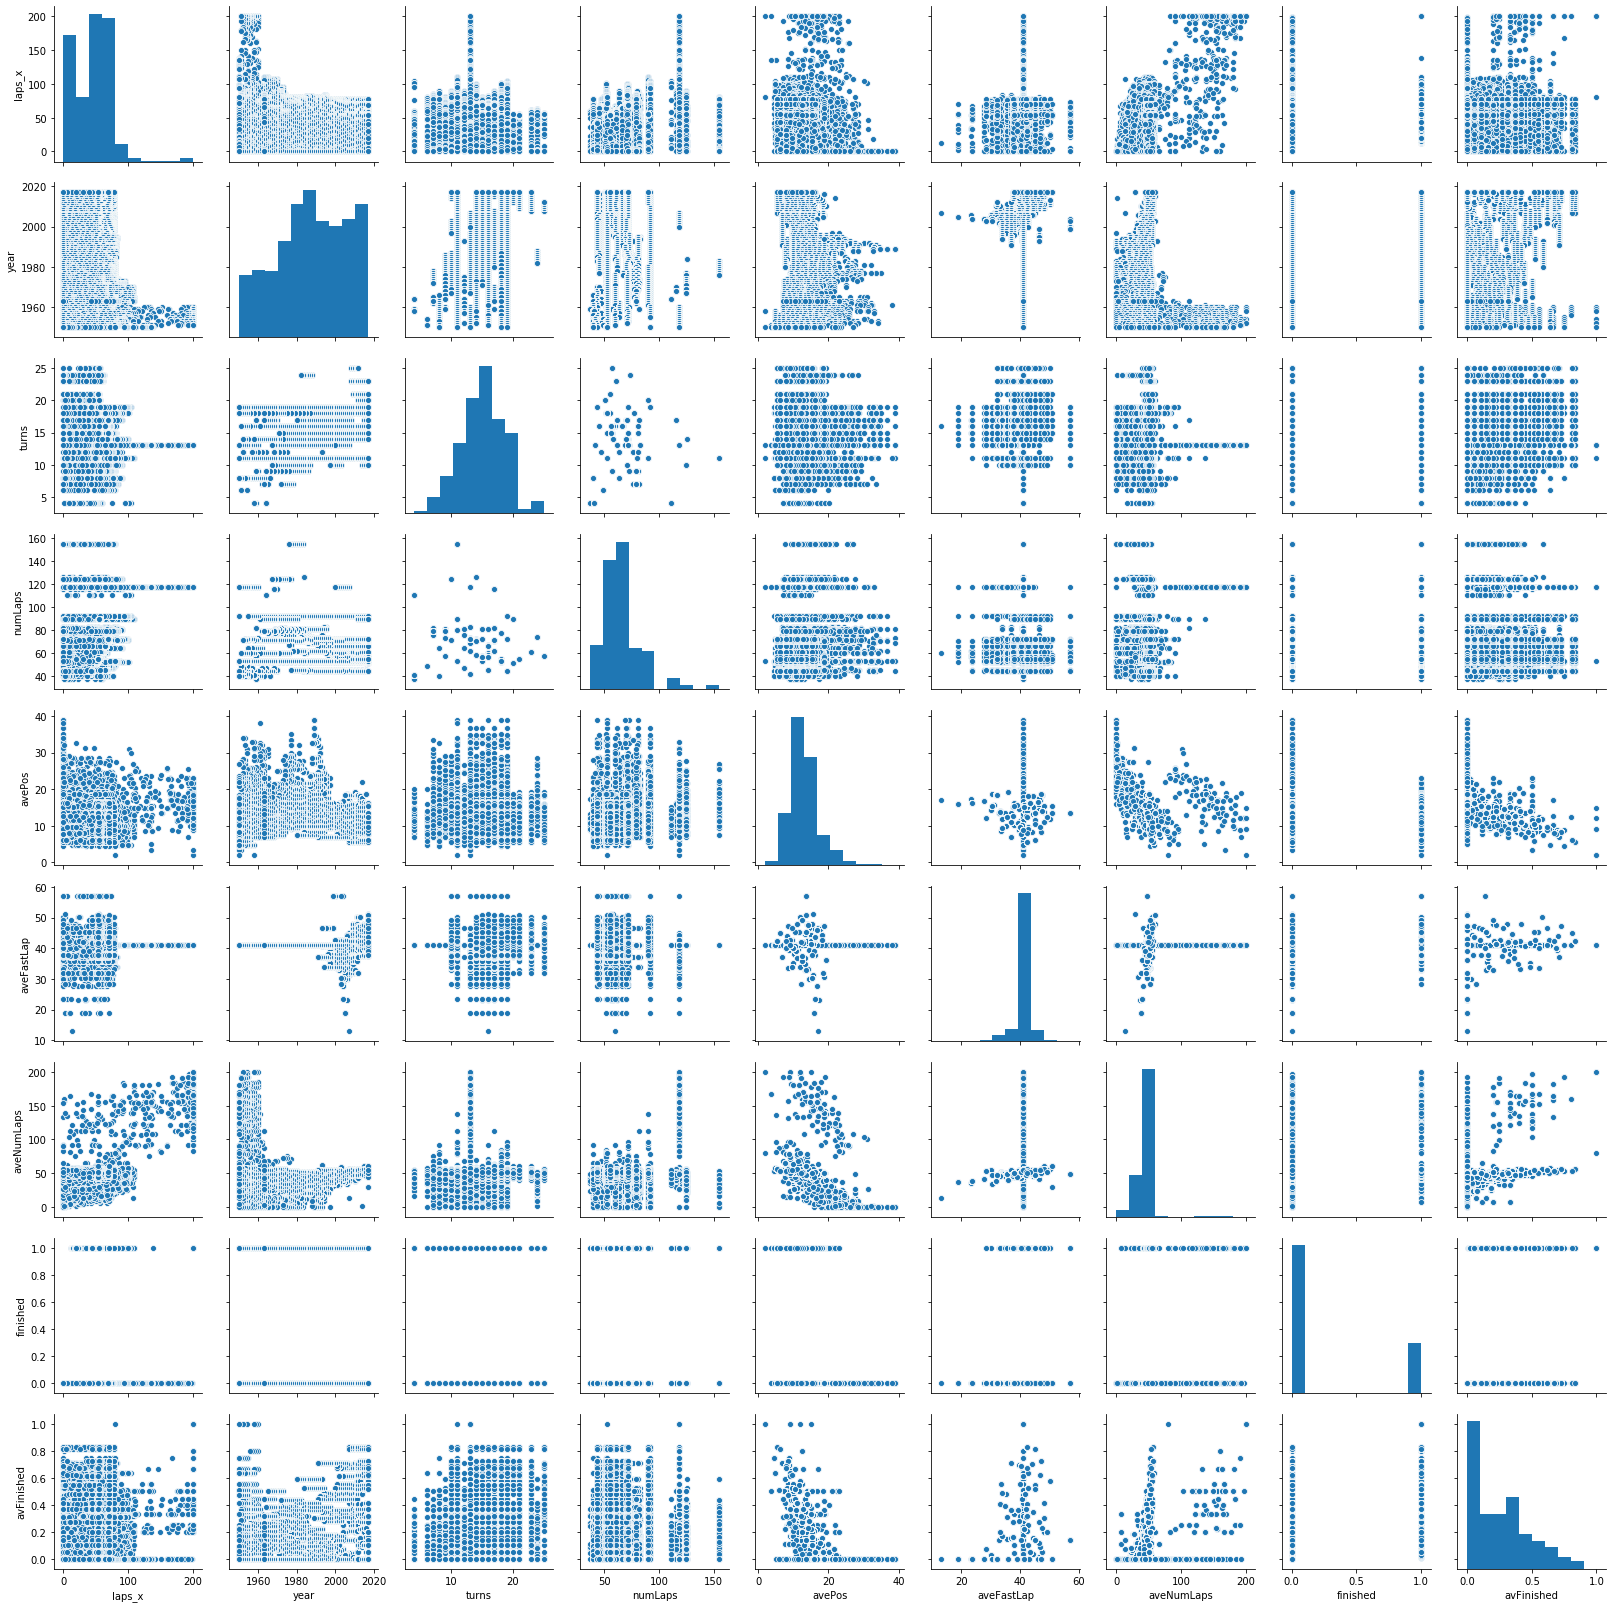

In [408]:
sns.pairplot(DF3)

# Model Details

In [495]:
newX2=DF3.drop(columns = ['finished','avFinished'])
newX=DF3.drop(columns = ['finished'])
#newX=DF3[['avFinished']]
print (newX[0:3]) # check 
newY=DF3['finished']
#print (type(newY))
# pandas core frame

   laps_x  year  turns  numLaps     avePos  aveFastLap  aveNumLaps  avFinished
0      58  2008   16.0     58.0   5.485577   42.453202   56.245192    0.831731
1      58  2008   16.0     58.0  10.722826   39.217391   52.711957    0.358696
2      58  2008   16.0     58.0   8.252427   43.939086   54.169903    0.703883


In [482]:
model = sm.Logit(newY, newX)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.364500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               finished   No. Observations:                23701
Model:                          Logit   Df Residuals:                    23693
Method:                           MLE   Df Model:                            7
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                  0.3554
Time:                        13:11:06   Log-Likelihood:                -8639.0
converged:                       True   LL-Null:                       -13402.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
laps_x         0.0520      0.001     45.944      0.000       0.050       0.054
year          -0.0006      0.000     -3.665      0.000      -0.001      -0.000
turns          0.0371      0.006      6.328      0.000       0.026       0.049
numLaps       -0.0326      0.001    -22.838      0.000      -0.035      -0.030
avePos        -0.0663      0.010     -6.628      0.000      -0.086      -0.047
aveFastLap    -0.0060      0.007     -0.862      0.388      -0.020       0.008
aveNumLaps    -0.0382      0.002    -21.693      0.000      -0.042      -0.035
avFinished     5.7265      0.161     35.514      0.000       5.410       6.043
==============================================================================
"""

In [485]:
np.exp(result.params)

laps_x          1.053428
year            0.999392
turns           1.037779
numLaps         0.967954
avePos          0.935852
aveFastLap      0.993970
aveNumLaps      0.962549
avFinished    306.885629
dtype: float64

In [483]:
#without total finish proportion
model2 = sm.Logit(newY, newX2)
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.394703
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               finished   No. Observations:                23701
Model:                          Logit   Df Residuals:                    23694
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                  0.3020
Time:                        13:11:46   Log-Likelihood:                -9354.9
converged:                       True   LL-Null:                       -13402.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
laps_x         0.0484      0.001     45.517      0.000       0.046       0.050
year           0.0011      0.000      7.085      0.000       0.001       0.001
turns          0.0709      0.006     12.867      0.000       0.060       0.082
numLaps       -0.0331      0.001    -24.162      0.000      -0.036      -0.030
avePos        -0.3647      0.007    -51.162      0.000      -0.379      -0.351
aveFastLap     0.0147      0.007      2.254      0.024       0.002       0.028
aveNumLaps    -0.0206      0.002    -12.814      0.000      -0.024      -0.017
==============================================================================
"""

In [484]:
np.exp(result2.params)

laps_x        1.049567
year          1.001074
turns         1.073430
numLaps       0.967473
avePos        0.694402
aveFastLap    1.014848
aveNumLaps    0.979604
dtype: float64

# Train/Test

In [496]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
len(X_test), len(y_test)

(7111, 7111)

In [497]:
X_train2,X_test2,y_train2,y_test2=train_test_split(newX2,newY,test_size=0.3,random_state=3)
len(X_test), len(y_test)

(7111, 7111)

In [500]:
lr = LogisticRegression()
mdl = lr.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

lr2 = LogisticRegression()
mdl2 = lr2.fit(X_train2, y_train2)
train_score2=lr2.score(X_train2, y_train2)
test_score2=lr2.score(X_test2, y_test2)

C:\Users\Sierra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sierra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Validation

In [505]:
predictions = lr.predict(X_test)
predictions2 = lr2.predict(X_test2)

In [506]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5334
           1       0.69      0.56      0.62      1777

    accuracy                           0.83      7111
   macro avg       0.78      0.74      0.75      7111
weighted avg       0.82      0.83      0.82      7111



In [509]:
#without total finish proportion
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5334
           1       0.66      0.51      0.57      1777

    accuracy                           0.81      7111
   macro avg       0.75      0.71      0.73      7111
weighted avg       0.80      0.81      0.80      7111



In [457]:
print(confusion_matrix(y_test,predictions))

[[4887  447]
 [ 776 1001]]


In [510]:
#without total finish proportion
print(confusion_matrix(y_test2,predictions2))

[[4863  471]
 [ 870  907]]


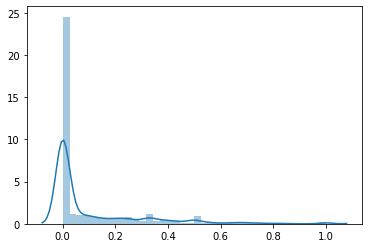

In [512]:
sns.distplot(finishAve)